In [1]:
from sklearn import model_selection, datasets, svm
from qiskit import QuantumCircuit, Aer, IBMQ, QuantumRegister, ClassicalRegister
import qiskit
import numpy as np
import copy
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data[0:100]
Y = iris.target[0:100]
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, train_size=0.8, random_state=42)

In [3]:
N = 4

In [4]:
def feature_map(X) :
    q = QuantumRegister(N)
    c = ClassicalRegister(1)
    qc = QuantumCircuit(q,c)
    
    for i, x in enumerate(X) :
        qc.rx(x, i)
        
    return qc, c

In [5]:
def variational_circuit(qc, theta):
    
    for i in range(N-1):
        qc.cnot(i, i+1)
    qc.cnot(N-1, 0)
    for i in range(N):
        qc.ry(theta[i], i)
    return qc

In [6]:
#from qiskit.primitives import Sampler
#from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Options
#service = QiskitRuntimeService(channel="ibm_quantum")
#backend = service.backend("ibm_quebec")
#options = Options(resilience_level = 1) # 1 = measurement error mitigation
#sampler = Sampler(backend)

In [7]:
def quantum_nn(X, theta, simulator=True):
    
    qc, c = feature_map(X)
    qc = variational_circuit(qc, theta)
    qc.measure(0,c)
    
    shots = 1E4
    backend = Aer.get_backend('qasm_simulator')
    
    if simulator == False:
        
        shots = 5000
        #provider = IBMQ.load_account()
        backend = service.backend("ibm_quebec")
        
    job = qiskit.execute(qc, backend, shots=shots)
    result = job.result()
    counts = result.get_counts(qc)
    
    return(counts['1']/shots)

    qc.draw('mpl')

In [8]:
def loss (prediction, target):
    return (prediction - target)**2

In [9]:
def gradient(X, Y, theta):
    
    delta = 0.01
    grad = []
    for i in range(len(theta)):
        
        dtheta = copy.copy(theta)
        dtheta[i] += delta
        
        pred1 = quantum_nn(X, dtheta)
        pred2 = quantum_nn(X, theta)
        
        grad.append((loss(pred1, Y) - loss(pred2, Y)) / delta)
        
    return np.array(grad)

In [10]:
def accuracy(X, Y, theta):
    
    counter = 0
    for X_i, Y_i in zip(X, Y):
        
        prediction = quantum_nn(X_i, theta)
        
        if prediction < 0.5 and Y_i == 0:
            counter += 1
        elif prediction >= 0.5 and Y_i == 1:
            counter += 1
            
    return counter/len(Y)

In [11]:
eta = 0.075
loss_list = []
theta = np.ones(N)

print('Epoch \t Loss \t Training Accuracy')

for i in range(50):
    
    loss_tmp = []
    for X_i, Y_i in zip(X_train, Y_train):

        prediction = quantum_nn(X_i, theta)
        loss_tmp.append(loss(prediction, Y_i))
        theta = theta - eta * gradient(X_i, Y_i, theta)
        
    loss_list.append(np.mean(loss_tmp))
    acc_train = accuracy(X_train, Y_train, theta)
    
    print(f'{i} \t {loss_list[-1]:.3f} \t {acc_train:.3f}')

Epoch 	 Loss 	 Training Accuracy


C:\Users\Asus\AppData\Local\Temp\ipykernel_20924\2434704148.py:4: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(i, i+1)
C:\Users\Asus\AppData\Local\Temp\ipykernel_20924\2434704148.py:5: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(N-1, 0)
C:\Users\Asus\AppData\Local\Temp\ipykernel_20924\2434704148.py:4: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(i, i+1)
C:\Users\Asus\AppData\Local\Temp\ipykernel_

0 	 0.258 	 0.800
1 	 0.234 	 0.863
2 	 0.215 	 0.838
3 	 0.208 	 0.812
4 	 0.206 	 0.812
5 	 0.211 	 0.825
6 	 0.212 	 0.812
7 	 0.205 	 0.825
8 	 0.204 	 0.838
9 	 0.216 	 0.838
10 	 0.225 	 0.800
11 	 0.223 	 0.750
12 	 0.240 	 0.750
13 	 0.259 	 0.412
14 	 0.247 	 0.787
15 	 0.217 	 0.812
16 	 0.208 	 0.800
17 	 0.207 	 0.825
18 	 0.202 	 0.812
19 	 0.202 	 0.838
20 	 0.207 	 0.787
21 	 0.217 	 0.787
22 	 0.217 	 0.850
23 	 0.234 	 0.750
24 	 0.211 	 0.800
25 	 0.209 	 0.812
26 	 0.209 	 0.838
27 	 0.204 	 0.812
28 	 0.203 	 0.787
29 	 0.203 	 0.800
30 	 0.206 	 0.825
31 	 0.205 	 0.825
32 	 0.203 	 0.800
33 	 0.203 	 0.825
34 	 0.207 	 0.838
35 	 0.207 	 0.787
36 	 0.206 	 0.800
37 	 0.204 	 0.812
38 	 0.202 	 0.825
39 	 0.203 	 0.825
40 	 0.203 	 0.812
41 	 0.204 	 0.825
42 	 0.203 	 0.812
43 	 0.202 	 0.800
44 	 0.205 	 0.787
45 	 0.204 	 0.825
46 	 0.204 	 0.787
47 	 0.204 	 0.800
48 	 0.203 	 0.800
49 	 0.203 	 0.825


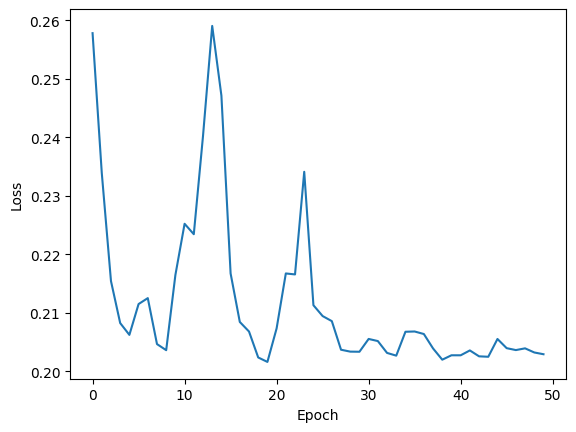

In [12]:
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [13]:
acc_test = accuracy(X_test, Y_test, theta)
print(f"QNN classification train score: {acc_train}")
print(f"QNN classification test score: {acc_test}")

C:\Users\Asus\AppData\Local\Temp\ipykernel_20924\2434704148.py:4: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(i, i+1)
C:\Users\Asus\AppData\Local\Temp\ipykernel_20924\2434704148.py:5: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(N-1, 0)


QNN classification train score: 0.825
QNN classification test score: 0.8
